In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# inline plots
%matplotlib inline

In [59]:
# read data into a DataFrame
data = pd.read_csv('now_bookings_thu_2016.csv', index_col=1)
data

,year,now_bookings_count_thu
day_of_week,,
5,201607,141884
5,201606,110291
5,201605,99427
5,201604,80021
5,201603,87005
5,201602,73729
5,201601,66351


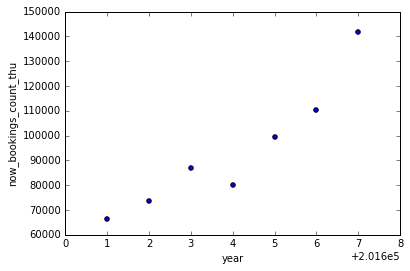

In [60]:
data.plot(kind='scatter', x='year', y='now_bookings_count_thu')

In [61]:
feature_cols = ['year']
X = data[feature_cols]
y = data.now_bookings_count_thu

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)

-2247394491.0
[ 11148.03571429]


In [62]:
lm.score(X, y)

0.86834923946637577

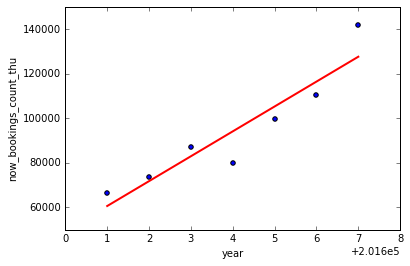

In [63]:
# create a DataFrame with the minimum and maximum values of year
X_new = pd.DataFrame({'year': [data.year.min(), data.year.max()]})

# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

# first, plot the observed data
data.plot(kind='scatter', x='year', y='now_bookings_count_thu')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [64]:
predicted_table = pd.DataFrame({'year': [201608, 201609], 
'now_bookings_count_thu': [lm.predict(201608), lm.predict(201609)]})
predicted_table

,now_bookings_count_thu,year
0,[138693.285715],201608
1,[149841.321429],201609
